In [2]:
import numpy as np
import scipy as sp
from numpy import array
from scipy import linalg
from scipy import optimize
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Introduction

The goal of this project is to model how two firms determine the efficient amount of a good to produce in a Cournot competetition.

The following assumptions are used in the model:
- There are two firms (1 and 2), who produce the same homogenous product
- Cooperation between the two firms is not allowed.
- The two firms choose simultaneously the quaintity to produce ($q_1$ and $q_2$).
- The total amount of the good equals $Q = q_1 + q_2$
- The market price is decreasing in the total quantity: $P(Q)=a-Q$, where $a$ is a constant
- Both firms have the same marginal cost $c$, where we assume $0 \leq c<a$

The two-firm model is later extended with an additional firm.

In [3]:
# We define the inverse demand function:

def p(q1,q2,a):
    return a - q1 - q2

# We define the cost function:

def cost(q,c):
    cost = q * c
    return cost

# We define the profit function for firm 1:

def profit1(q1,q2,a,c):
    return p(q1,q2,a) * q1 - cost(q1,c)

# We define the profit function for firm 2:

def profit2(q1,q2,a,c):
    return p(q1,q2,a) * q2 - cost(q2,c)

We now define the best response function for firm 1 and 2, which are symmetrical, as they solve the identical problem:

In [10]:
# Initial guess:

q0 = [1]

def best_response1(q2,a,c):
    q1opt = optimize.minimize(lambda q0: -profit1(q0,q2,a,c), q0).x[0]
    return q1opt

def best_response2(q1,a,c):
    q2opt = optimize.minimize(lambda q0: -profit2(q1,q0,a,c), q0).x[0]
    return q2opt

In a Nash equilibrium we must have, that the both firms produce an amount, which corresponds to a best response given what the other firm chooses to produce. Therefore, we have the following two equations with two unknown parameters. These two equations must be solved to find a Nash equilibrium.

In [11]:
def conditions(q,parameters):
    u = q[0] - best_response1(q[1],parameters[0],parameters[1])
    y = q[1] - best_response2(q[0],parameters[0],parameters[2])
    return [u,y]

We now define the two vectors, one which consists of the initial values for the production of each firm $q$. We then solve the two equations (u and y), by using optimization and the initial starting point defined in $q$ and the chosen parameters in the vector "parameters". Below we have expanded with float sliders where you can choose the marginal cost of each firm and the intersection, whereafter the nash equilibrium of the production for the firms can be observed. The production function is defined for each firm, where the production is set to 0, in case of a negative production.

In [12]:
# Production vector, initial values:

q = [2,2]

# Here we define the function, f, which contains a solver that solves the Nash equilibrium,
# given the parameters that are chosen in the sliders below.

def f(c1,c2,a):
    parameters = [a,c1,c2]
    solver = optimize.fsolve(conditions,q,args=(parameters))
    if solver[0] < 0:
        solver[0] = 0
    if solver[1] < 0:
        solver[1] = 0
        
    print("\n Nash Equilibrium: \n The Nash equilibrium, firm 1 produces " + str(round(solver[0],2)) + " units and firm 2 produces " + str(round(solver[1],2)) + " units.")

# Here three sliders are created:
    
widgets.interact(f,
    c1 = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    c2 = widgets.FloatSlider(description="$c_2$",min=0,max=5),
    a = widgets.FloatSlider(description="$a$", min=5,max=10),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c1, c2, a)>

# Plots

We can now plot the output of firm 1 as a function of the output for firm 2, given $a$ and $c$:

In [13]:
def g(a,c):
    
# Creating empty box:
    prod2 = np.arange(0,10,0.1)
    prod1 = []

    for q2 in prod2:
        q1 = round(best_response1(q2,a,c),3)

    # Adding the best response production to the empty box:
        prod1.append(q1)

    plt.title("Figure 1: Best response for firm 1 (blue) and production level\n for firm 2 (orange), given production level for firm 2")
    plt.ylabel("q")
    plt.xlabel("$q_2$")
    plt.plot(prod2, prod1)
    plt.plot(prod2, prod2)

widgets.interact(g,
    a = widgets.FloatSlider(description="$a$",min=5,max=10),
    c = widgets.FloatSlider(description="$c$",min=0,max=5)
 )

interactive(children=(FloatSlider(value=5.0, description='$a$', max=10.0, min=5.0), FloatSlider(value=0.0, des…

<function __main__.g(a, c)>

In figure 1 we see the best response for firm 1 (blue curve) given production level of firm 2 and production level of firm 2 given the production level of firm 2 (orange curve, 45 degree line). We see, that the best response production level for firm 1 is negatively correlated with the production level of firm 2. Furthermore, we see that the intersection between the two curves corresponds to a Nash-equilibrium point, given the parameters (more on Nash equilibrium below).

Below we plot both the best respons functions against the marginal cost $c$, given $a = 10$:

In [14]:
# Here we define different marginal costs and production for firm 1 and 2:

costs = np.arange(0,5,0.1)
prod1 = np.arange(0,5,0.1)
prod2 = np.arange(0,5,0.1)

# Creating empty boxes:

x = []
y = []

for q2 in prod2:
    q1 = round(best_response1(q2,10,0),3)
    x.append(q1)
    
for c, q1 in zip(costs,prod1):
    q2 = round(best_response2(q1,10,c),3)
    y.append(q2)

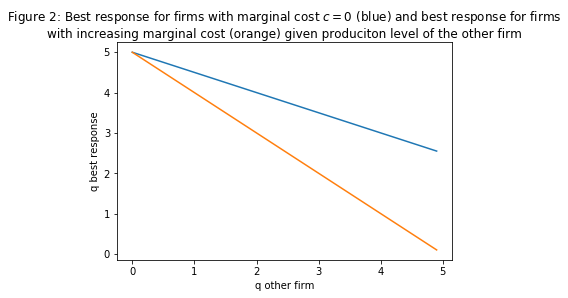

In [15]:
plt.title("Figure 2: Best response for firms with marginal cost $c = 0$ (blue) and best response for firms\nwith increasing marginal cost (orange) given produciton level of the other firm")
plt.ylabel("q best response")
plt.xlabel("q other firm")
plt.plot(costs, x)
plt.plot(costs, y)

In figure 2, we see a plot showing the best response for a firm (blue curve) with marginal cost $c=0$ and $a=10$. We also see a best response for a firm (orange curve) with increasing marginal costs going from 0 to 5, as production of the other firm increases correspondingly and $a=10$. The point here is, that the gap between the two curves increases drastically, as the marginal cost increases. If we for example look at a production level of the other firm of 5 units (x-axis), then the firm with no marginal cost will produce 3 units (blue curve), while the firm with marginal cost = 5 will produce 0 units (orange curve). Note that the x-axis shows both the production level of the other firm and the costs in the case where the marginal costs are increasing (orange curve).

In [17]:
prod1 = np.arange(0,5,0.1)
prod2 = np.arange(0,5,0.1)

def f(c1,c2):
#Create empty lists:
    x = []
    y = []

    for q2 in prod2:
        q1 = round(best_response1(q2,10,c1),3)
        x.append(q1) #Adding data to the x-list

    for q1 in prod1:
        q2 = round(best_response2(q1,10,c2),3)
        y.append(q2) #Adding data to the y-list
        
    #Creating figure 3:
    plt.title("Figure 3: Best response for firm 1 with marginal cost $c_1$ (blue) and best response for\nfirm 2 with marginal cost $c_2$ (orange) given produciton level of the other firm")
    plt.ylabel("q best response")
    plt.xlabel("q other firm")
    plt.plot(prod2,x)
    plt.plot(prod1,y)

widgets.interact(f,
    c1 = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    c2 = widgets.FloatSlider(description="$c_2$",min=0,max=5),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c1, c2)>

In figure 3, the blue curve corresponds to the best response for firm 1 given the production level of firm 2 and the marginal cost $c_1$ of firm 1. The orange curve corresponds to the best response for firm 2 given the production level of firm 1 and the marginal cost $c_2$ of firm 2. The maginal costs for both firms can separetely be adjusted above in the sliders. A higher marginal cost shifts the best response curve downwards.

# Three firms extension

In [18]:
def p(q1,q2,q3,a):
    return a - q1 - q2 - q3

# We define the cost function:

def cost(q,c):
    cost = q * c
    return cost

# We define the profit function for firm 1:

def profit1(q1,q2,q3,a,c):
    return p(q1,q2,q3,a) * q1 - cost(q1,c)

# We define the profit function for firm 2:

def profit2(q1,q2,q3,a,c):
    return p(q1,q2,q3,a) * q2 - cost(q2,c)

# We define the profit function for firm 3:

def profit3(q1,q2,q3,a,c):
    return p(q1,q2,q3,a) * q3 - cost(q3,c)

We now define the best response function for the three firms:

In [19]:
# Initial guess:

q0 = [1]

def best_response1(q2,q3,a,c):
    q1opt = optimize.minimize(lambda q0: -profit1(q0,q2,q3,a,c), q0).x[0]
    return q1opt

def best_response2(q1,q3,a,c):
    q2opt = optimize.minimize(lambda q0: -profit2(q1,q0,q3,a,c), q0).x[0]
    return q2opt

def best_response3(q1,q2,a,c):
    q3opt = optimize.minimize(lambda q0: -profit3(q1,q2,q0,a,c), q0).x[0]
    return q3opt

We set up the three equations, with three unkown, that must be solved:

In [20]:
def conditions(q,parameters):
    u = q[0] - best_response1(q[1],q[2],parameters[0],parameters[1])
    y = q[1] - best_response2(q[0],q[2],parameters[0],parameters[2])
    z = q[2] - best_response3(q[0],q[1],parameters[0],parameters[3])
    return [u,y,z]

We now define a vector, which consists of the initial values for the production of each firm called $q$. Below we have expanded with float sliders where you can adjust the marginal cost for each firm and the intersection point, whereafter the production for each firm in the Nash equilibrium is shown. We have again defined all production functions and set 0, as the minimum production level if the Nash equilibrium production level is negative.

In [21]:
# Production vector, initial values:

q = [2,2,2]

def h(c1,c2,c3,a):
    parameters = [a,c1,c2,c3]
    solver = optimize.fsolve(conditions,q,args=(parameters))
    if solver[0] < 0:
        solver[0] = 0
    if solver[1] < 0:
        solver[1] = 0
    if solver[2] < 0:
        solver[2] = 0
    
    print(" \nNash equilibrium:\nIn the Nash equilibrium, firm 1 produces " + str(round(solver[0],2)) + " units, firm 2 produces " + str(round(solver[1],2)) + " units, and  firm 3 produces " + str(round(solver[2],2)) + " units.")

widgets.interact(h,
    c1 = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    c2 = widgets.FloatSlider(description="$c_2$",min=0,max=5),
    c3 = widgets.FloatSlider(description="$c_3$",min=0,max=5),
    a = widgets.FloatSlider(description="$a$", min=5,max=10),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.h(c1, c2, c3, a)>

## Conclusion

We conclude that when two firms compete on quantity, they will produce an amount that corresponds to a best response, given the production of the other firm, when they are in equilibrium. The same holds when we extend the model from two to three firms. It holds that the production of each firm is negatively related to the production of the other firms and negatively related to its marginal cost.

## Appendix - Analytical approach

#### Here you can get a brief guide on how to find the analytical solution for a Nash equilibrium in a Cournout setting with two firms:

We look for a Nash Equilibrium, where both firms choose their best response, given the other firms best response.

The equations showing the profit for the two firms are:

Firm 1 profit: $\pi_1(q_1,q_2) = P(Q) * q_1 - c * q_1$

Firm 2 profit: $\pi_2(q_1,q_2) = P(Q) * q_2 - c * q_2$

We insert the price function and the marginal cost:

Firm 1 profit: $\pi_1(q_1,q_2) = (a - q_1 - q_2 - c) * q_1$

Firm 2 profit: $\pi_2(q_1,q_2) = (a - q_1 - q_2 - c) * q_2$

Since both firms want to maximize profit, we calculate the best response function, given every quantity the other firm chooses to produce:

### $\frac{\partial \pi_1}{\partial q_1} = 0$ <=> $ q_1(q_2) = \frac{a-c-q_2}{2}$
### $\frac{\partial \pi_2}{\partial q_2} = 0$ <=> $ q_2(q_1) = \frac{a-c-q_1}{2}$

We calculate the best response quantity, given the equilibrium quantity of the other firm and use that we are in a Nash Equilibrium

### $ q_1^* = \frac{a-c-q_2^*}{2}$
### $ q_2^* = \frac{a-c-q_1^*}{2}$

We now solve the equilibrium amounts, by inserting the second equation in the first and imposing symmetry:

### $q_1^* = \frac{a-c-\frac{(a-c-q_1^*)}{2}}{2} <=> q_1^* = \frac{a-c}{3} = q_2^*$
